In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv('BUD.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/22/2015,126.730003,127.959999,126.720001,127.470001,109.314354,854400
1,7/23/2015,127.129997,127.139999,125.519997,125.800003,107.882210,1412600
2,7/24/2015,125.870003,126.040001,124.269997,124.389999,106.673027,1116100
3,7/27/2015,123.690002,123.919998,122.800003,123.339996,105.772583,1400700
4,7/28/2015,123.529999,124.230003,122.900002,123.800003,106.167076,983400


In [3]:
data1 = data.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
data1.head()

,Date,Close
0,7/22/2015,127.470001
1,7/23/2015,125.800003
2,7/24/2015,124.389999
3,7/27/2015,123.339996
4,7/28/2015,123.800003


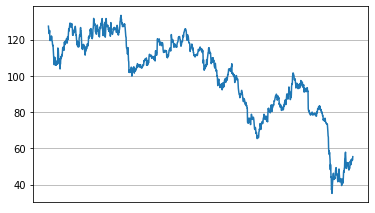

In [4]:
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
months = mdates.MonthLocator()

fig, ax = plt.subplots()
ax.plot('Date', "Close", data=data)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x
ax.grid(True)

fig.autofmt_xdate()

plt.show()

Text(0.5, 1.0, 'BUD (Anheuser-Busch) Stock History')

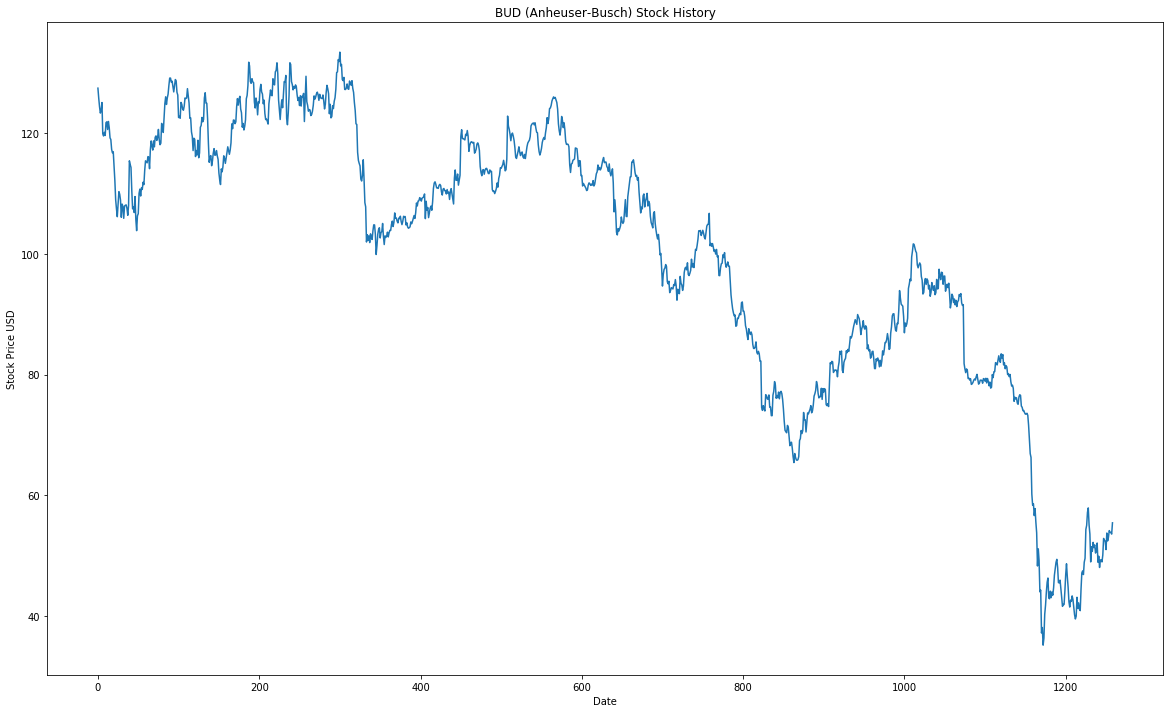

In [5]:
data1["Date"]=pd.to_datetime(data1.Date,format="%m/%d/%Y")
plt.figure(figsize=(20,12))
plt.plot(data1["Close"])
plt.ylabel('Stock Price USD')
plt.xlabel('Date')
plt.title('BUD (Anheuser-Busch) Stock History')

In [6]:
model_df = data1.iloc[0:619,:]
model_df.head()

,Date,Close
0,2015-07-22,127.470001
1,2015-07-23,125.800003
2,2015-07-24,124.389999
3,2015-07-27,123.339996
4,2015-07-28,123.800003


In [7]:
from sklearn.model_selection import train_test_split

x = 365
input_data = []
output_data = []

for i in range(x,len(model_df)):
    input_data.append(model_df.loc[i-x:i,"Close"])
    output_data.append(model_df.loc[i,"Close"])

X = np.array(input_data)
y = np.array(output_data).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

In [8]:
# Scale the data
X_scaler=MinMaxScaler(feature_range=(0,1)).fit(X_train)
y_scaler=MinMaxScaler(feature_range=(0,1)).fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [9]:
# Reshape training data
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))

In [10]:
#Added LSTM layer along with dropout layers to prevent overfitting. Add Dense layer to specify a one unit output. Compile the model using the adam optomizer and set the loss as the mean_squared_error.
model=Sequential()
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(X_train_scaled.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_scaled,y_train_scaled,epochs=10,batch_size=65,verbose=2)

Train on 190 samples
Epoch 1/10
190/190 - 4s - loss: 0.1711
Epoch 2/10
190/190 - 1s - loss: 0.0425
Epoch 3/10
190/190 - 1s - loss: 0.0410
Epoch 4/10
190/190 - 1s - loss: 0.0268
Epoch 5/10
190/190 - 1s - loss: 0.0189
Epoch 6/10
190/190 - 1s - loss: 0.0245
Epoch 7/10
190/190 - 1s - loss: 0.0213
Epoch 8/10
190/190 - 1s - loss: 0.0155
Epoch 9/10
190/190 - 1s - loss: 0.0153
Epoch 10/10
190/190 - 1s - loss: 0.0163


In [11]:
# Reshape testing data to fit new model
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [12]:
# Evaluate the data model
model_loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(f"Loss: {model_loss}")

64/1 - 1s - loss: 0.0144
Loss: 0.013896409422159195


In [13]:
# Predict y values for test data, then see how closely they match actuals
predicted_closing_price=model.predict(X_test_scaled)
predicted_closing_price=y_scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

array([[118.564224],
       [108.318924],
       [118.91846 ],
       [117.84805 ],
       [118.53264 ],
       [121.01132 ],
       [112.57521 ],
       [116.17573 ],
       [108.15178 ],
       [113.61938 ],
       [110.63628 ],
       [108.41614 ],
       [113.795105],
       [107.43973 ],
       [122.37392 ],
       [110.84352 ],
       [110.46574 ],
       [112.13117 ],
       [118.73909 ],
       [112.37968 ],
       [118.1198  ],
       [108.43744 ],
       [113.68086 ],
       [114.97478 ],
       [119.02437 ],
       [117.81347 ],
       [114.95142 ],
       [113.74449 ],
       [118.431404],
       [113.93746 ],
       [117.54359 ],
       [116.84712 ],
       [116.088036],
       [119.30154 ],
       [114.41006 ],
       [110.34789 ],
       [115.93758 ],
       [107.86734 ],
       [110.53864 ],
       [114.071655],
       [112.762276],
       [112.384   ],
       [112.74799 ],
       [118.12858 ],
       [115.716515],
       [117.91628 ],
       [117.61018 ],
       [118.9

In [14]:
predicted_stock_price = [predicted_closing_price[i][0] for i in range(len(predicted_closing_price))]

In [15]:
new_data = pd.DataFrame({"Predicted": predicted_stock_price})
new_data

,Predicted
0,118.564224
1,108.318924
2,118.918457
3,117.848053
4,118.532639
...,...
59,116.419312
60,112.485138
61,113.174934
62,118.694016


In [16]:
actual_values = y_test_scaled.reshape((y_test_scaled.shape[0], y_test_scaled.shape[1]))
actual_values = y_scaler.inverse_transform(actual_values)
actual_values

array([[117.      ],
       [106.239998],
       [121.629997],
       [118.629997],
       [116.870003],
       [118.199997],
       [110.82    ],
       [121.18    ],
       [105.879997],
       [111.559998],
       [106.809998],
       [104.489998],
       [114.290001],
       [105.940002],
       [122.779999],
       [107.690002],
       [110.849998],
       [111.370003],
       [118.019997],
       [108.279999],
       [116.089996],
       [106.199997],
       [113.290001],
       [110.419998],
       [117.639999],
       [115.809998],
       [113.769997],
       [111.410004],
       [115.529999],
       [111.349998],
       [119.620003],
       [113.900002],
       [113.349998],
       [120.949997],
       [110.370003],
       [109.339996],
       [113.300003],
       [105.940002],
       [107.610001],
       [111.629997],
       [110.849998],
       [112.550003],
       [110.040001],
       [115.620003],
       [113.620003],
       [116.489998],
       [117.440002],
       [115.8

In [17]:
actuals = [actual_values[i][0] for i in range(len(actual_values))]
new_data["Actual"] = actuals
new_data

,Predicted,Actual
0,118.564224,117.000000
1,108.318924,106.239998
2,118.918457,121.629997
3,117.848053,118.629997
4,118.532639,116.870003
...,...,...
59,116.419312,114.180000
60,112.485138,109.089996
61,113.174934,111.400002
62,118.694016,117.150002


In [18]:
inputs = []

for i in range(619,len(data1)):
    inputs.append(data1.loc[i-x:i,"Close"])

X_forecast = np.array(inputs)
X_forecast_scaled = X_scaler.transform(X_forecast)

In [19]:
# Reshape data to use in model
X_forecast_scaled = X_forecast_scaled.reshape((X_forecast_scaled.shape[0],X_forecast_scaled.shape[1],1))

In [20]:
forecasted_closing_price = model.predict(X_forecast_scaled)
forecasted_closing_price=y_scaler.inverse_transform(forecasted_closing_price)
forecasted_closing_price

array([[113.78069 ],
       [113.947296],
       [114.12607 ],
       [114.31606 ],
       [114.49548 ],
       [114.6653  ],
       [114.84775 ],
       [115.05185 ],
       [115.27455 ],
       [115.47362 ],
       [115.65289 ],
       [115.80736 ],
       [115.91925 ],
       [115.9893  ],
       [116.01127 ],
       [116.03626 ],
       [116.01831 ],
       [115.95119 ],
       [115.873726],
       [115.81095 ],
       [115.68265 ],
       [115.36232 ],
       [114.991234],
       [114.53051 ],
       [113.90778 ],
       [113.19518 ],
       [112.48549 ],
       [111.777374],
       [111.1205  ],
       [110.54142 ],
       [110.084656],
       [109.70729 ],
       [109.38289 ],
       [109.12335 ],
       [108.9797  ],
       [108.97229 ],
       [108.971664],
       [108.98106 ],
       [109.091064],
       [109.30071 ],
       [109.615295],
       [110.035866],
       [110.50483 ],
       [111.06586 ],
       [111.67032 ],
       [112.289665],
       [112.874756],
       [113.3

In [21]:
forecast = [forecasted_closing_price[i][0] for i in range(len(forecasted_closing_price))]

In [22]:
forecasted_stock = data1.iloc[619:,:]
forecasted_stock

,Date,Close
619,2018-01-04,113.599998
620,2018-01-05,114.739998
621,2018-01-08,113.949997
622,2018-01-09,114.330002
623,2018-01-10,113.919998
...,...,...
1254,2020-07-15,54.160000
1255,2020-07-16,53.910000
1256,2020-07-17,53.849998
1257,2020-07-20,53.580002


In [23]:
forecasted_stock["Prediction"] = forecast
forecasted_stock

C:\Users\Joymode\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Prediction
619,2018-01-04,113.599998,113.780693
620,2018-01-05,114.739998,113.947296
621,2018-01-08,113.949997,114.126068
622,2018-01-09,114.330002,114.316063
623,2018-01-10,113.919998,114.495483
...,...,...,...
1254,2020-07-15,54.160000,81.774063
1255,2020-07-16,53.910000,81.820198
1256,2020-07-17,53.849998,81.864372
1257,2020-07-20,53.580002,81.904396


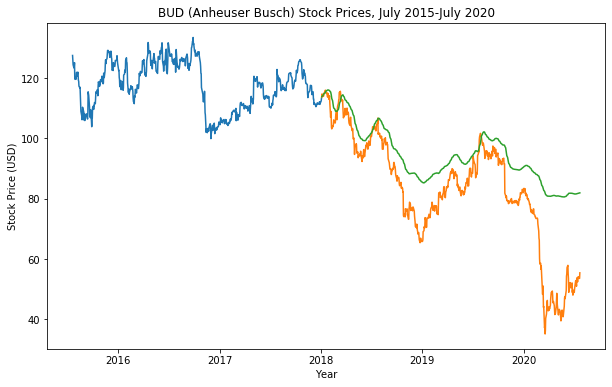

In [24]:
model_df = model_df.set_index("Date")
forecasted_stock = forecasted_stock.set_index("Date")
plt.figure(figsize=(10,6))
plt.plot(model_df["Close"])
plt.plot(forecasted_stock[['Close',"Prediction"]])
plt.title("BUD (Anheuser Busch) Stock Prices, July 2015-July 2020")
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.savefig('BUD_Prediction.png')